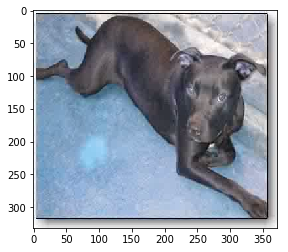

In [0]:
#DataSet : https://www.kaggle.com/thesherpafromalabama/cats-and-dogs-sentdex-tutorial
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = '/content/PetImages' #Path for directory with training data.
categories = ['Dog', 'Cat']
for category in categories:
    path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
        plt.imshow(img_array)
        plt.show()
        break
    break


In [0]:
print('Dimensions : ' + str(img_array.shape) + '\n\n\n' ) #Shape or Dimensions of an image
print(img_array) #Representation of image as array

Dimensions : (332, 373, 3)



[[[248 254 255]
  [247 253 255]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[233 239 246]
  [245 251 255]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[248 254 255]
  [208 214 221]
  [248 254 255]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]]


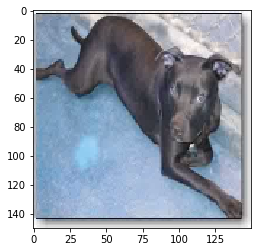

In [0]:
img_size = 150
new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing image to get a constant shape throughout the dataset.
plt.imshow(new_img_arr)

In [0]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
                new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing all the images
                training_data.append([new_img_arr, class_num])
            except Exception as e:
                pass

create_training_data()

In [0]:
print(len(training_data)) #Totoal images to train

24946


In [0]:
import random

random.shuffle(training_data) #Shuffling the images

In [0]:
images = []
labels = []

In [0]:
for features,label in training_data:
    images.append(features) #Separating images and labels into two different lists
    labels.append(label)
images = np.array(images).reshape(-1, img_size, img_size, 3)

In [0]:
import pickle

#Saving the processed images and label list into files
pickle_out = open('cats_dogs_features', 'wb')
pickle.dump(images,pickle_out)
pickle_out.close()
pickle_out = open('cats_dogs_labels', 'wb')
pickle.dump(labels,pickle_out)
pickle_out.close()